In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

plt.style.use('fivethirtyeight')

In [115]:
daniel_csv = './Building Info Database.xlsx'

In [116]:
daniel_csv

'./Building Info Database.xlsx'

In [117]:
#making an array of numbers for index
num = []
for i in range(0,1285):
    num.append(i)

In [137]:
clean_df = pd.read_excel(daniel_csv, indexl= num)

In [138]:
clean_df.shape

(1285, 46)

In [139]:
clean_df.columns

Index(['Official Name\tString\t\t\t', 'Display Name\tString\t\t\t',
       'System Name\tString\t\t\t', 'Asset Number\tString\t\t\t',
       'Style\tString\t\t\t', 'Location\tString\t\t\t',
       'Affiliation\tString\t\t\t', 'Category\tString\t\t\t',
       'Primary Use\tString\t\t\t', 'UBC Code\tString\t\t\t',
       'Planning\tString\t\t\t', 'Condition\tString\t\t\t',
       'Operations\tString\t\t\t', 'Address\tString\t\t\t',
       'City\tString\t\t\t', 'County\tString\t\t\t', 'State\tString\t\t\t',
       'Zip Code\tDouble\t\t\t', 'Country\tString\t\t\t',
       'Address Code\tString\t\t\t', 'City Code\tDouble\t\t\t',
       'County Code\tDouble\t\t\t', 'Floors\tDouble\t\t\t',
       'Height\tDouble\t\t\t', 'Footprint\tDouble\t\t\t',
       'Perimeter\tDouble\t\t\t', 'Basic Gross\tDouble\t\t\t',
       'C/U Gross\tDouble\t\t\t', 'Circulation\tDouble\t\t\t',
       'Constructed\tInt32\t\t\t', 'Occupied\tDateTime\t\t\t',
       'Renovated\tString\t\t\t', 'Vacated\tString\t\t\t',
  

In [140]:
#rFixing the col names
cols = ['Official Name','Primary Use','Condition','Circulation','Constructed','Primary Usage', 'Source - Campus Steam Loop', 'Source - Campus CHW Loop','CAAN','CHW Metered','Steam Metered']

In [141]:
dropp =[ 'Display Name\tString\t\t\t','System Name\tString\t\t\t', 'Asset Number\tString\t\t\t','Style\tString\t\t\t', 'Affiliation\tString\t\t\t','Location\tString\t\t\t','UBC Code\tString\t\t\t', 'Category\tString\t\t\t','Occupied\tDateTime\t\t\t','Renovated\tString\t\t\t', 'Vacated\tString\t\t\t','Demolished\tString\t\t\t',  'Planning\tString\t\t\t','Operations\tString\t\t\t', 'Address\tString\t\t\t','City\tString\t\t\t', 'County\tString\t\t\t', 'State\tString\t\t\t','Zip Code\tDouble\t\t\t', 'Country\tString\t\t\t','Address Code\tString\t\t\t', 'City Code\tDouble\t\t\t','County Code\tDouble\t\t\t', 'Floors\tDouble\t\t\t','Height\tDouble\t\t\t', 'Footprint\tDouble\t\t\t','Perimeter\tDouble\t\t\t', 'Basic Gross\tDouble\t\t\t','C/U Gross\tDouble\t\t\t','Prmary Usage (SF)\tInt32\t\t\t','Top Org with Most Space\tString\t\t\t','Sec. Usage (Percent)\tInt32\t\t\t', 'Secondary Usage (Type)\tString\t\t\t','Secondary Usage (SF)\tInt32\t\t\t','Dept. with Most Space\tString\t\t\t' ]
len(dropp), len(cols)

(35, 11)

In [142]:
clean_df.drop(columns = dropp,axis = 1, inplace = True)

In [143]:
#Reduced the cols to 14
clean_df.shape

(1285, 11)

In [144]:
clean_df.columns  = cols

In [145]:
clean_df.head(3)

,Official Name,Primary Use,Condition,Circulation,Constructed,Primary Usage,Source - Campus Steam Loop,Source - Campus CHW Loop,CAAN,CHW Metered,Steam Metered
0,Haring Hall,CLS - Classroom,3 - Fair,27522,1949,Laboratory,Yes,Yes,3493,No,No
1,Kemper Hall,CLS - Classroom,2 - Good,42793,1993,Laboratory,Yes,Yes,4633,No,No
2,Young Hall,CLS - Classroom,4 - Poor,17801,1940,Laboratory,Yes,Yes,3266,No,No


## Using the API

In [13]:
from ocs_sample_library_preview import OCSClient
import configparser
import io
import json

In [14]:
from ocs_hackdavis import (
    ucdavis_buildings,  # list of campus buildings
    ucdavis_ceeds_of,   # list of CEED element of a building (Electricity, Steam, Chilled Water, etc)
    ucdavis_streams_of, # The list of all OCS data streams for a building and CEED pair  
    ucdavis_building_metadata,  # Metadata for a building: building code, lat/long, usage, etc.  
    ocs_stream_interpolated_data,  # Interpolated data from a stream given a time range + interpolation interval
    ucdavis_outside_temperature,  # Outside temperature at UC Davis for a given a time range + interpolation interval
)

In [15]:
config_text = u"""
; IMPORTANT: replace these values with those provided by OSIsoft
[Configurations]
Namespace = UC__Davis

[Access]
Resource = https://dat-b.osisoft.com
Tenant = 65292b6c-ec16-414a-b583-ce7ae04046d4
ApiVersion = v1-preview

[Credentials] 
ClientId = 82fca0c2-3004-42c0-81cf-cc6968df1f47
ClientSecret = 3VYy318vxlFGKVuQ4+toahSyg7IqWUVKiGHJDvH/IvY=
"""

In [16]:
config = configparser.ConfigParser(allow_no_value=True)
config.read_file(io.StringIO(config_text))

ocs_client = OCSClient(
    config.get("Access", "ApiVersion"),
    config.get("Access", "Tenant"),
    config.get("Access", "Resource"),
    config.get("Credentials", "ClientId"),
    config.get("Credentials", "ClientSecret"),
)

namespace_id = config.get("Configurations", "Namespace")
print(f"namespace_id: '{namespace_id}'")

namespace_id: 'UC__Davis'


In [17]:
buildings = ucdavis_buildings()
len(buildings), buildings[:3]  # display first 25

(159,
 ['ARC Pavilion',
  'Academic Surge Building',
  'Activities and Recreation Center'])

## Looking at various energy types the buildings userough the API

In [26]:
typesOfCeesDict= {}
uniqueCeedTypes = set()
usesNaturalGas = set()
buildingCAANUsingGas = set()
for building in buildings:
    ceed = ucdavis_ceeds_of(building)
    
    #Populating the uniqueCeed
    for energyType in ceed:
        uniqueCeedTypes.add(energyType)
    
    #Populating the types of Ceed dict
    if len(ceed) not in typesOfCeesDict:
        typesOfCeesDict[len(ceed)] = 1
    else:
        typesOfCeesDict[len(ceed)]+= 1
        
    #Finding buildings with natural gas
    gas = "Natural Gas"
    if gas in ceed:
        usesNaturalGas.add(building)
        buildingCAAD = ucdavis_building_metadata(ocs_client, namespace_id, building)['CAAN']
        buildingCAANUsingGas.add(buildingCAAD)

In [146]:
#names of energy types
uniqueCeedTypes, buildingCAANUsingGas

({'ChilledWater', 'Electricity', 'Natural Gas', 'Steam'},
 {0.0, 3840.0, 4477.0, 4828.0, 4845.0})

In [147]:
typesOfCeesDict

{3: 65, 1: 76, 2: 18}

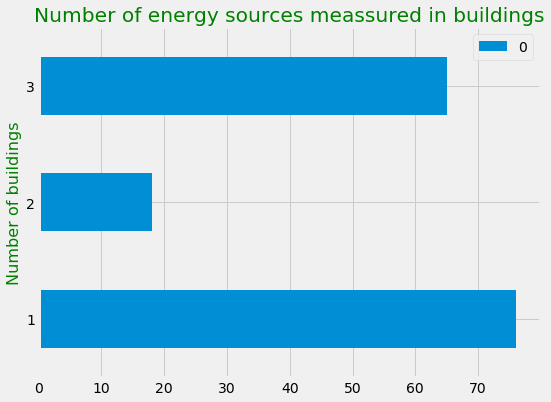

In [148]:
plot = pd.DataFrame.from_dict(typesOfCeesDict, orient = 'index').sort_index().plot(kind = 'barh')
plot.set_title("Number of energy sources meassured in buildings", color = 'green')
plot.set_ylabel('Number of buildings', fontsize=16, color = 'green');

### Only 5 buildings use natural gas

In [167]:
clean_df.head(4)

,Official Name,Primary Use,Condition,Circulation,Constructed,Primary Usage,Source - Campus Steam Loop,Source - Campus CHW Loop,CAAN,CHW Metered,Steam Metered
0,Haring Hall,CLS - Classroom,3 - Fair,27522,1949,Laboratory,Yes,Yes,3493,No,No
1,Kemper Hall,CLS - Classroom,2 - Good,42793,1993,Laboratory,Yes,Yes,4633,No,No
2,Young Hall,CLS - Classroom,4 - Poor,17801,1940,Laboratory,Yes,Yes,3266,No,No
3,Wickson Hall,CLS - Classroom,2 - Good,34357,1959,Laboratory,Yes,Yes,3351,Yes,Yes


In [177]:
len (usesNaturalGas), usesNaturalGas
print( "\t","Building name", "\t ", "Primary Use", "\t\t ", "Constructed")
for index in range(0, clean_df.shape[0]):
    if clean_df.loc[index]['CAAN'] in buildingCAANUsingGas:
        print( clean_df.loc[index]['Official Name'], "\t ",clean_df.loc[index]['Primary Use'],"\t\t ",clean_df.loc[index]['Constructed'])

	 Building name 	  Primary Use 		  Constructed
Animal Resource Service J1 	  LAB - Lab / Research 		  1966
Center for Health & Environment Toxic Pollutant Laboratory 	  LAB - Lab / Research 		  1982
Hutchison Child Development Center 	  SPC - Special Use 		  2007
Transportation and Parking Services 	  SPT - Support 		  2005
Transportation and Parking Services 	  SPT - Support 		  2005
Transportation and Parking Services 	  SPT - Support 		  2005


### Expecting the other energy sources Gas buildings use

In [32]:
for gasBuilding in usesNaturalGas:
    print(gasBuilding, ucdavis_ceeds_of(gasBuilding))

Transportation and Parking Services ['ChilledWater', 'Electricity', 'Natural Gas']
Primate Respiratory Disease Center ['Electricity', 'Natural Gas']
Center for Health & Environment Toxic Pollutant Laboratory ['Electricity', 'Natural Gas']
Animal Resource Service J1 ['Electricity', 'Natural Gas']
Hutchison Child Development Center ['Electricity', 'Natural Gas']


## Looking at metadata from API

In [33]:
obj = ucdavis_building_metadata(ocs_client, namespace_id, "Activities and Recreation Center")
obj

{'Annual Cost': 151156.0,
 'BuildingName': 'ARC',
 'kWh Rate': 0.0687,
 'Prefix': 'Activities_and_Recreation_Center_MSB',
 'Rollover': 10000000.0,
 'CAAN': 4799.0,
 'Construction Date': '04/15/2002',
 'Display Name': 'Activities and Recreation Center',
 'Latitude': 38.5428969596,
 'Longitude': -121.759644393,
 'Maintained Gross Sq. Ft.': 158120.0,
 'Primary Usage (Type)': 'REC - Athletics & Recreation'}

## Extracting names and CAAN

In [178]:
#Inspecting missing data
clean_df.isnull().sum()

Official Name                   0
Primary Use                     0
Condition                       0
Circulation                     0
Constructed                     0
Primary Usage                 230
Source - Campus Steam Loop    135
Source - Campus CHW Loop      135
CAAN                            0
CHW Metered                   135
Steam Metered                 135
dtype: int64

### Filtering out the buildings by matching the 159 given names in the API

In [179]:
names_to_drop = []
for index in range(0,clean_df.shape[0]):
    if clean_df.loc[index][0] not in buildings:
        names_to_drop.append(index)

In [180]:
clean_df.drop(names_to_drop,inplace = True)

In [181]:
#reduced the height of the df
clean_df.shape

(153, 11)

In [182]:
#resetting the indeces
clean_df.reset_index(drop = True, inplace =True)

In [183]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 11 columns):
Official Name                 153 non-null object
Primary Use                   153 non-null object
Condition                     153 non-null object
Circulation                   153 non-null int64
Constructed                   153 non-null int64
Primary Usage                 143 non-null object
Source - Campus Steam Loop    147 non-null object
Source - Campus CHW Loop      147 non-null object
CAAN                          153 non-null object
CHW Metered                   147 non-null object
Steam Metered                 147 non-null object
dtypes: int64(2), object(9)
memory usage: 13.3+ KB


### Extracting the CAAN + names of buildings

In [354]:
CAAN_name_df = clean_df.drop(columns = ['Category','Primary Use','UBC Code','Condition', 'Circulation', 'Constructed', "Primary Use", 'Source - Campus Steam Loop', "Source - Campus CHW Loop",'Secondary Usage','CHW Metered','Steam Metered'])

In [358]:
CAAN_name_df.to_csv(r'C:\Users\Nobody\Desktop\osidata\venv\Lib\site-packages\CAAN_name.csv',header = True,index = False)

## Finding the Use Types

In [286]:
primary_use_vc = clean_df['Primary Use'].value_counts()
primary_use_vc

LAB - Lab / Research                           62
OFF - Academic / Administrative Office         20
CLS - Classroom                                16
SPC - Special Use                              13
GEN - General Academic / Administrative Use    11
SPT - Support                                  10
REC - Athletics & Recreation                    5
THO - Teaching Hospital / Clinic                4
LIB - Library / Study                           3
PRK - Parking Structure                         2
UNK - Unclassified                              2
RES - Non-Specific Residential                  2
STR - Storage                                   1
MED - Student / Employee Health Care            1
STH - Student Housing                           1
Name: Primary Use, dtype: int64

In [307]:
LAB_df = clean_df[clean_df['Primary Use'] == "LAB - Lab / Research"]
LAB_df['Primary Usage'].value_counts()

Laboratory     40
Animal          9
Special         4
Hospital        3
Mechanical      2
Greenhouse      1
Storage         1
Circulation     1
Name: Primary Usage, dtype: int64

### Relationship between Primary Usage and Primary Use

In [314]:
print("Primary Use","\t\t","Primary Usage")
for value in primary_use_vc.index:
    use_df = clean_df[clean_df['Primary Use'] == value]
    
    print(value,"=>\t",use_df['Primary Usage'].value_counts().index[0])
    print()

Primary Use 		 Primary Usage
LAB - Lab / Research =>	 Laboratory

OFF - Academic / Administrative Office =>	 Office

CLS - Classroom =>	 Laboratory

SPC - Special Use =>	 Special

GEN - General Academic / Administrative Use =>	 Office

SPT - Support =>	 Office

REC - Athletics & Recreation =>	 Athletics / Recreation

THO - Teaching Hospital / Clinic =>	 Hospital

LIB - Library / Study =>	 Library / Study

PRK - Parking Structure =>	 Parking

UNK - Unclassified =>	 Athletics / Recreation

RES - Non-Specific Residential =>	 Office

STR - Storage =>	 Storage

MED - Student / Employee Health Care =>	 Hospital

STH - Student Housing =>	 Food



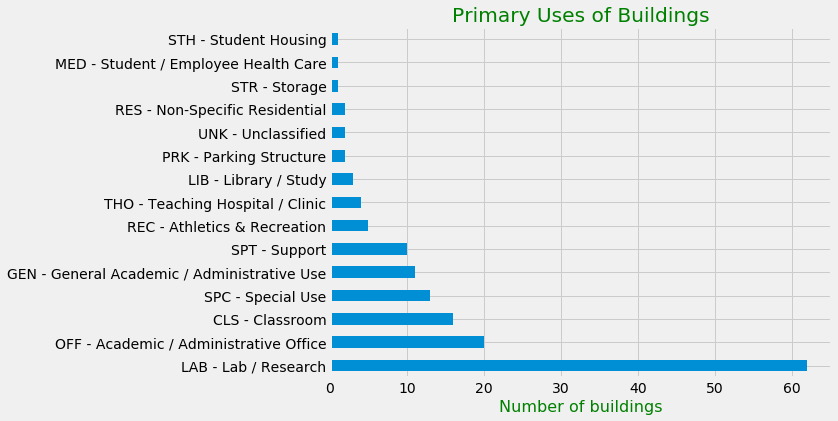

In [43]:
use_plot = primary_use_vc.plot(kind = 'barh')
use_plot.set_title("Primary Uses of Buildings", color= 'green')
use_plot.set_xlabel('Number of buildings', fontsize=16, color = 'green');

In [292]:
use_vc = clean_df['Primary Usage'].value_counts()
use_vc

Laboratory                57
Office                    27
Animal                    12
Special                   10
Hospital                   7
Athletics / Recreation     6
Classroom                  5
Circulation                3
Mechanical                 3
Storage                    2
Parking                    2
Library / Study            2
Assembly / Exhibit         2
Day Care                   1
Food                       1
Merchandising              1
Greenhouse                 1
Residential - Dorm         1
Name: Primary Usage, dtype: int64

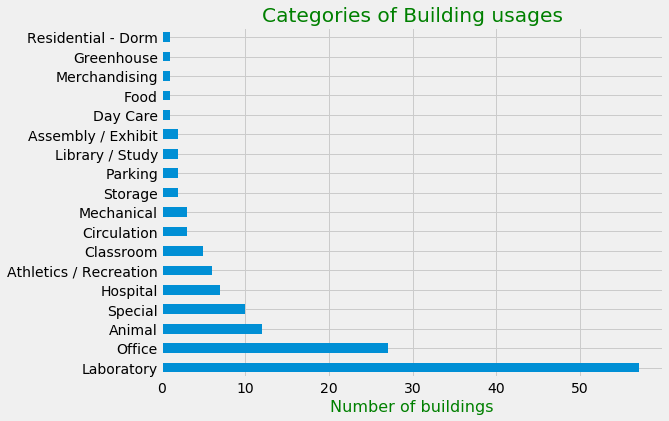

In [191]:
usage_plot=use_vc.plot(kind = 'barh')
usage_plot.set_title("Categories of Building usages", color= 'green')
usage_plot.set_xlabel('Number of buildings', fontsize=16, color = 'green');

### Looking at building conditions

In [253]:
condition_vc = clean_df['Condition'].value_counts()

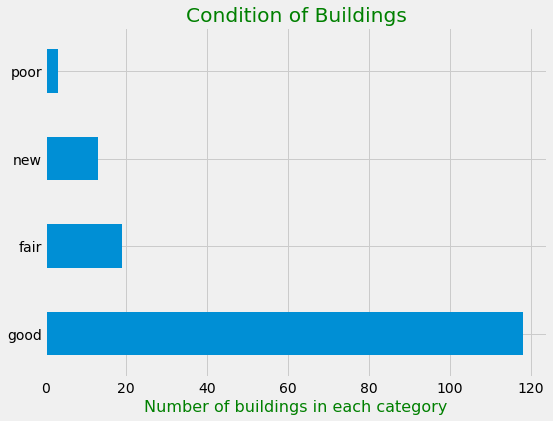

In [259]:
condition_plot= condition_vc.plot(kind = 'barh')
condition_plot.set_yticklabels(['good', 'fair', 'new', 'poor'], minor = False);
condition_plot.set_title("Condition of Buildings", color= 'green')
condition_plot.set_xlabel('Number of buildings in each category', fontsize=16, color = 'green');


In [498]:
age_vs = clean_df.Constructed.value_counts()

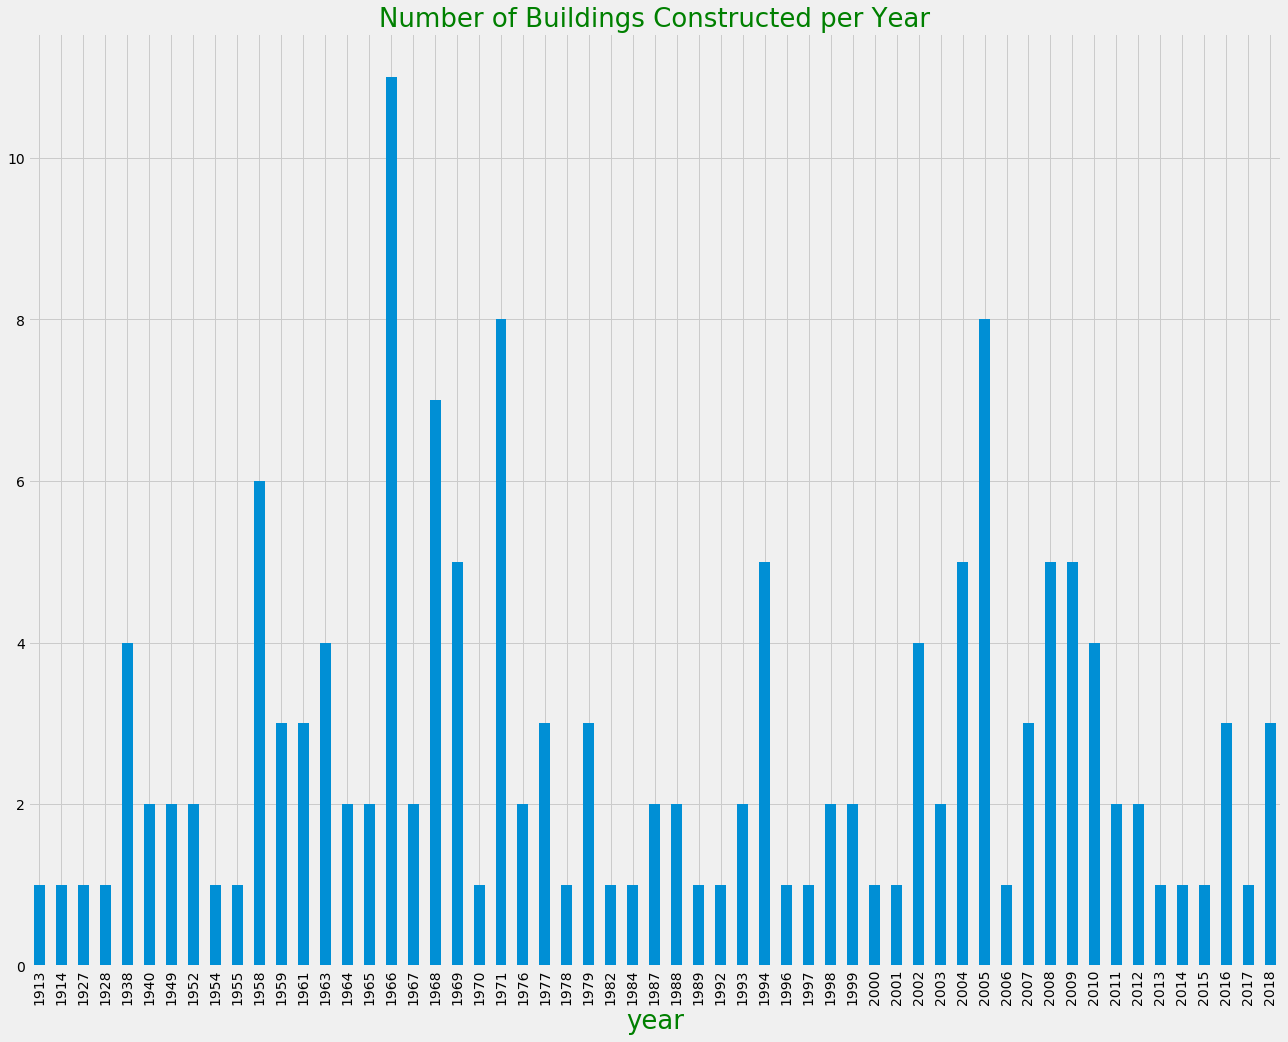

In [582]:
age_plot = clean_df.Constructed.value_counts().sort_index().plot(kind = 'bar',figsize=(20,16))
age_plot.set_title("Number of Buildings Constructed per Year",fontsize = 26, color= 'green')
age_plot.set_xlabel('year', fontsize=26, color = 'green');

### Looking at the building built in 1913

In [46]:
#go to each row and see if the year is 1913
clean_df.loc[clean_df.Constructed == 1914]

,Official Name,Category,Primary Use,UBC Code,Condition,Circulation,Constructed,Primary Usage,Source - Campus Steam Loop,Source - Campus CHW Loop,Secondary Usage,CAAN,CHW Metered,Steam Metered
107,The Barn,G - General,OFF - Academic / Administrative Office,5 - Wood Frame,2 - Good,1778,1914,Laboratory,No,No,Office,3225,No,No


### Cross checking CAAN, Annual Cost, Steam Metered, and CHW Metered with API data
#### Merging API metadata

In [49]:
building_ceed= []
annual_cost = []
caan_check = []
#{'ChilledWater', 'Electricity', 'Natural Gas', 'Steam'}

for index in range(0, clean_df.shape[0]):
    building_name = clean_df.loc[index]['Official Name']
    
    CEEDS_list = ucdavis_ceeds_of(building_name)
    cost = ucdavis_building_metadata(ocs_client, namespace_id,building_name)['Annual Cost']
    caan = ucdavis_building_metadata(ocs_client, namespace_id,building_name)['CAAN']
    
    building_ceed.append(CEEDS_list)
    annual_cost.append(cost)
    caan_check.append(caan)

In [192]:
clean_df['CEEDS'] = building_ceed

In [193]:
len(annual_cost)

153

In [194]:
clean_df['Annual Cost'] = annual_cost

In [195]:
len(caan_check)

153

### Found mismatch of CAAN numbers

In [196]:
for index in range(0, 153):
    if caan_check[index] != clean_df.loc[index]['CAAN']:
        print (clean_df.loc[index]['Official Name'], caan_check[index],clean_df.loc[index]['CAAN'])

Everson Hall 0.0 3350
Primate Respiratory Disease Center 0.0 4923


### Analysing the CEEDS future

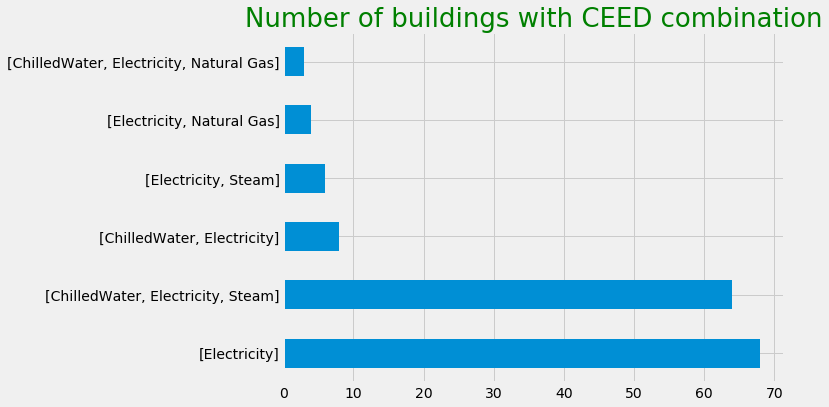

In [215]:
ceeds_plot=clean_df['CEEDS'].value_counts().plot(kind='barh');
ceeds_plot.set_title("Number of buildings with CEED combination",fontsize = 26, color= 'green');

### Analysing UN-Metered futures

In [212]:
clean_df['Steam Metered'].value_counts()

No     115
Yes     32
Name: Steam Metered, dtype: int64

In [609]:
clean_df.head(1)

,Official Name,Primary Use,Condition,Circulation,Constructed,Primary Usage,Source - Campus Steam Loop,Source - Campus CHW Loop,CAAN,CHW Metered,Steam Metered,CEEDS,Annual Cost
0,Haring Hall,CLS - Classroom,3 - Fair,27522,1949,Laboratory,Yes,Yes,3493,No,No,[Electricity],112335.0


In [624]:
print("Building name", "\t\t\t", "Age", "\t\t\t", "CEEDS", "\t\t\t\t\t", "Condition")
print('---------------------------------------------------------------------------------------------------------')
for index in range(0,clean_df.shape[0]):
    ceeds = clean_df.loc[index]['CEEDS']
    name = clean_df.loc[index]['Official Name']
    age = 2020 - clean_df.loc[index]['Constructed']
    condition = clean_df.loc[index]['Condition']
    
    if 'ChilledWater' in ceeds:
        if clean_df.loc[index]['CHW Metered'] == 'No':
            print(name,"\t\t\t",age, '\t', ceeds, "\t\t", condition)

Building name 			 Age 			 CEEDS 					 Condition
---------------------------------------------------------------------------------------------------------
Kemper Hall 			 27 	 ['ChilledWater', 'Electricity', 'Steam'] 		 2 - Good
Young Hall 			 80 	 ['ChilledWater', 'Electricity', 'Steam'] 		 4 - Poor
Olson Hall 			 57 	 ['ChilledWater', 'Electricity', 'Steam'] 		 2 - Good
Wellman Hall 			 51 	 ['ChilledWater', 'Electricity', 'Steam'] 		 2 - Good
Storer Hall 			 52 	 ['ChilledWater', 'Electricity', 'Steam'] 		 2 - Good
Sciences Lab Building 			 15 	 ['ChilledWater', 'Electricity', 'Steam'] 		 2 - Good
Cruess Hall 			 68 	 ['ChilledWater', 'Electricity', 'Steam'] 		 3 - Fair
Hunt Hall 			 71 	 ['ChilledWater', 'Electricity', 'Steam'] 		 3 - Fair
Physics Building 			 49 	 ['ChilledWater', 'Electricity', 'Steam'] 		 2 - Good
School of Education Building 			 44 	 ['ChilledWater', 'Electricity'] 		 2 - Good
Housing Administration 			 41 	 ['ChilledWater', 'Electricity'] 		 2 - Good
School of 

### Exploring Corrolations or results

In [509]:
pairplot_df = clean_df.drop(columns=['Primary Use', 'Circulation','Primary Usage', 'Source - Campus Steam Loop', 'CAAN','CHW Metered','Source - Campus CHW Loop','Steam Metered','CEEDS'])

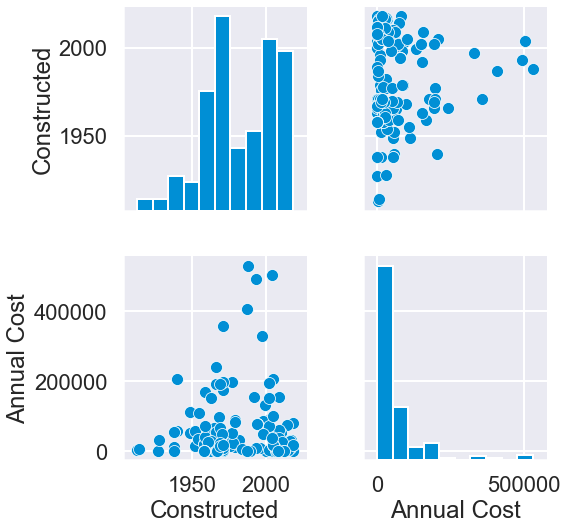

In [546]:
sns.set_style('darkgrid')
sns.set_context('poster')

sns.pairplot(pairplot_df, height = 4) ;

### Exploring what building are CHW Metered

In [548]:
metered_chw_buildings_df = clean_df[clean_df['CHW Metered'] == 'Yes']
metered_chw_buildings_df['Primary Use'].value_counts()

LAB - Lab / Research                           20
CLS - Classroom                                 4
SPC - Special Use                               2
THO - Teaching Hospital / Clinic                1
RES - Non-Specific Residential                  1
REC - Athletics & Recreation                    1
OFF - Academic / Administrative Office          1
STH - Student Housing                           1
GEN - General Academic / Administrative Use     1
LIB - Library / Study                           1
MED - Student / Employee Health Care            1
Name: Primary Use, dtype: int64

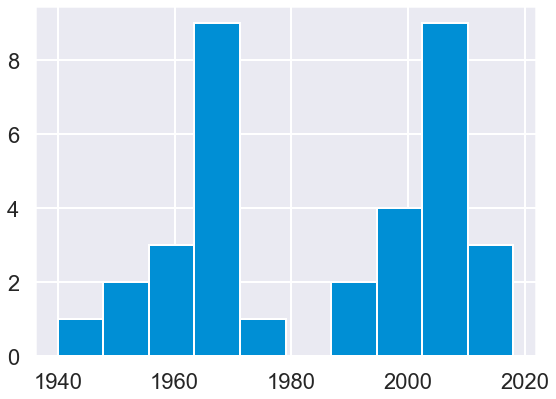

In [550]:
metered_chw_buildings_df.Constructed.hist()

In [552]:
zero_cost_df = clean_df[clean_df['Annual Cost'] == 0]
zero_cost_df.Condition.value_counts()

2 - Good                                  6
1 - New, built within the past 5 years    2
4 - Poor                                  1
3 - Fair                                  1
Name: Condition, dtype: int64

In [211]:
metered_steam_buildings_df = clean_df[clean_df['Steam Metered'] == 'Yes']
metered_steam_buildings_df.head(2)

,Official Name,Primary Use,Condition,Circulation,Constructed,Primary Usage,Source - Campus Steam Loop,Source - Campus CHW Loop,CAAN,CHW Metered,Steam Metered,CEEDS,Annual Cost
3,Wickson Hall,CLS - Classroom,2 - Good,34357,1959,Laboratory,Yes,Yes,3351,Yes,Yes,"[ChilledWater, Electricity, Steam]",167646.0
5,Valley Hall,CLS - Classroom,2 - Good,12400,2006,Classroom,Yes,Yes,4822,Yes,Yes,"[ChilledWater, Electricity, Steam]",49833.0


In [233]:
condition_vc = clean_df['Condition'].value_counts()
condition_vc.sort_index(inplace=True)
condition_vc[0]

13

In [340]:
condition_vc

2 - Good                                  118
3 - Fair                                   19
1 - New, built within the past 5 years     13
4 - Poor                                    3
Name: Condition, dtype: int64

### Inspecting the cost of each condition group

In [349]:
poor_mask = clean_df['Condition'] == '4 - Poor'
poor_condition_df = clean_df[poor_mask]
poor_condition_df

,Official Name,Primary Use,Condition,Circulation,Constructed,Primary Usage,Source - Campus Steam Loop,Source - Campus CHW Loop,CAAN,CHW Metered,Steam Metered,CEEDS,Annual Cost
2,Young Hall,CLS - Classroom,4 - Poor,17801,1940,Laboratory,Yes,Yes,3266,No,No,"[ChilledWater, Electricity, Steam]",58592.0
4,Walker Hall,CLS - Classroom,4 - Poor,3877,1927,Classroom,Yes,No,3201,No,No,[Electricity],0.0
14,Art Building Annex,CLS - Classroom,4 - Poor,1057,1938,Laboratory,Yes,Yes,3400,No,No,[Electricity],12780.0


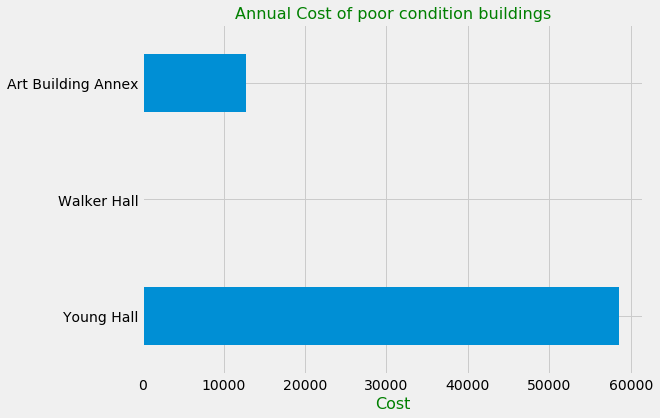

In [444]:
poor_cost_plot = poor_condition_df["Annual Cost"].plot(kind = 'barh')
poor_cost_plot.set_yticklabels(poor_condition_df["Official Name"], minor = False);
poor_cost_plot.set_title("Annual Cost of poor condition buildings",fontsize = 16, color= 'green');
poor_cost_plot.set_xlabel('Cost', fontsize=16, color = 'green');

### Fair buildings cost

In [424]:
fair_mask = clean_df['Condition'] == '3 - Fair'
fair_condition_df = clean_df[fair_mask]
fair_condition_df.describe()

,Circulation,Constructed,Annual Cost
count,19.000000,19.000000,19.000000
mean,12072.947368,1953.631579,69276.736842
std,9346.946058,13.885286,67208.402075
min,0.000000,1928.000000,0.000000
25%,3557.500000,1944.500000,24692.000000
50%,12761.000000,1954.000000,53023.000000
75%,18297.000000,1962.000000,90285.500000
max,27522.000000,1989.000000,240852.000000


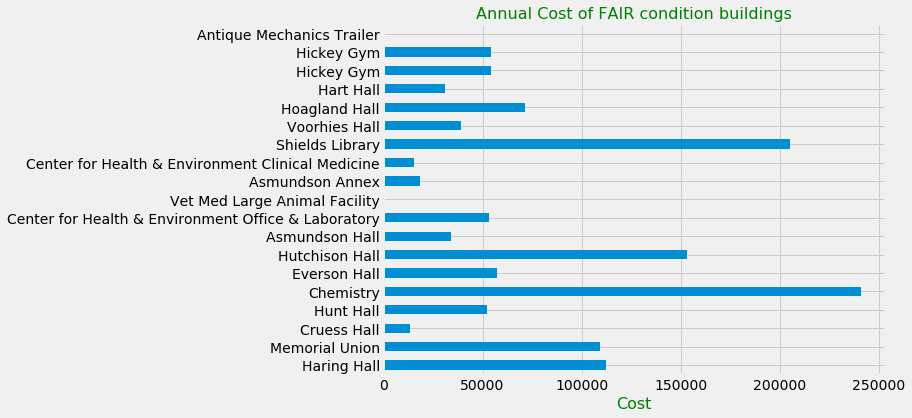

In [446]:
fair_cost_plot = fair_condition_df["Annual Cost"].plot(kind = 'barh')
fair_cost_plot.set_yticklabels(fair_condition_df["Official Name"], minor = False);
fair_cost_plot.set_title("Annual Cost of FAIR condition buildings",fontsize = 16, color= 'green');
fair_cost_plot.set_xlabel('Cost', fontsize=16, color = 'green'); 

### New building cost

In [357]:
new_mask = clean_df['Condition'] == '1 - New, built within the past 5 years'
new_condition_df = clean_df[new_mask]
new_condition_df

(13, 13)

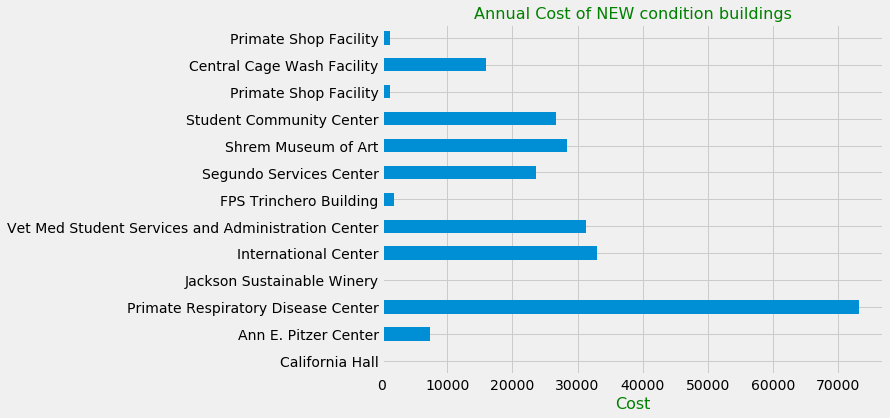

In [447]:
new_cost_plot = new_condition_df["Annual Cost"].plot(kind = 'barh')
new_cost_plot.set_yticklabels(new_condition_df["Official Name"], minor = False);
new_cost_plot.set_title("Annual Cost of NEW condition buildings",fontsize = 16, color= 'green');
new_cost_plot.set_xlabel('Cost', fontsize=16, color = 'green'); 

### Comparison of 3 conditions

In [450]:
df = poor_condition_df[poor_condition_df ["Official Name"] == 'Young Hall']

In [451]:
df=df.append(new_condition_df[new_condition_df['Official Name'] == 'Primate Respiratory Disease Center'])

In [452]:
df = df.append(fair_condition_df[fair_condition_df['Official Name'] == 'Chemistry'])

In [456]:
#Quickly finding the Good category's top spender
clean_df[clean_df['Condition'] == "2 - Good"].describe()

,Circulation,Constructed,Annual Cost
count,118.000000,118.000000,118.000000
mean,8839.406780,1984.076271,65350.881356
std,11932.276854,20.336972,102351.933470
min,0.000000,1913.000000,0.000000
25%,449.000000,1968.000000,9167.500000
50%,2823.500000,1983.000000,28547.000000
75%,12666.250000,2004.000000,75960.000000
max,51250.000000,2018.000000,530709.000000


In [628]:
#Thurman Laboratory, LAB - Lab / Research, Hospital
most_expensive_building = clean_df[clean_df['Annual Cost'] == 530709]

In [629]:
df=df.append(good)

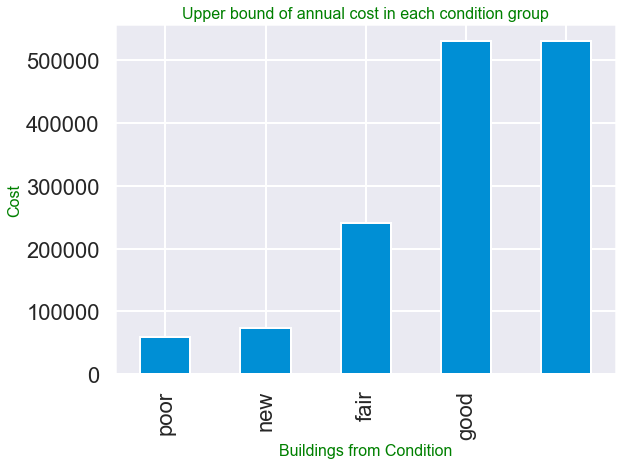

In [630]:
m=df['Annual Cost'].plot(kind = 'bar')
m.set_xticklabels(['poor', 'new', 'fair', 'good'], minor = False);
m.set_title("Upper bound of annual cost in each condition group",fontsize = 16, color= 'green');
m.set_ylabel('Cost', fontsize=16, color = 'green');
m.set_xlabel('Buildings from Condition', fontsize=16, color = 'green');

In [626]:
clean_df['Annual Cost'].describe()

count       153.000000
mean      61064.189542
std       94068.420225
min           0.000000
25%        9155.000000
50%       28692.000000
75%       67143.000000
max      530709.000000
Name: Annual Cost, dtype: float64

In [637]:
cost_dist_df = clean_df.drop(columns = ['Primary Use','Condition','CEEDS','Source - Campus Steam Loop', 'Official Name','Source - Campus CHW Loop','Circulation','Constructed','Primary Usage', 'Primary Use','CHW Metered', 'Steam Metered'])

In [640]:
cost_dist_df

,CAAN,Annual Cost
0,3493,112335.0
1,4633,493424.0
2,3266,58592.0
3,3351,167646.0
4,3201,0.0
...,...,...
148,4466,83725.0
149,4269,22680.0
150,4268,14807.0
151,4790,35992.0


In [644]:
cost_dist_df['Annual Cost'] = pd.to_numeric(cost_dist_df['Annual Cost'])

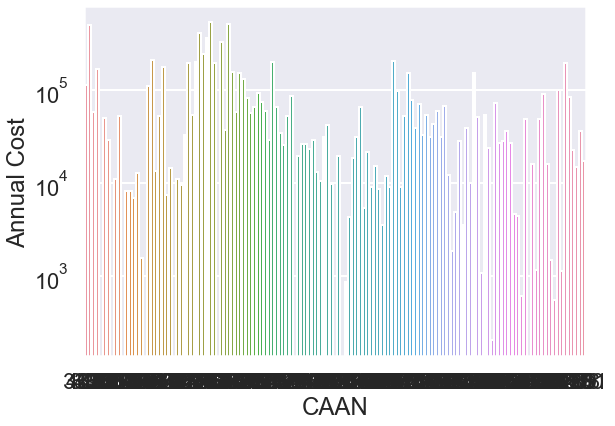

In [667]:
sns.barplot(x = cost_dist_df['CAAN'], y = cost_dist_df['Annual Cost'], log  = True)
